In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib Inline

In [3]:
!pip install wget

  Preparing metadata (setup.py) ... - done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=aa53a80171458762883fbcb5abcb040146bd3d78e93d648d81e44ba104ef9e6f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv

--2022-02-17 09:41:05--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2022-02-17 09:41:06 (3.64 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



In [5]:
df=pd.read_csv('daily-bike-share.csv')
df['day']=pd.DatetimeIndex(df['dteday']).day
df.drop(['instant','dteday'],axis=1,inplace=True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  rentals     731 non-null    int64  
 12  day         731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [7]:
numeric_col=[x for x in df.columns 
            if df[x].dtypes == 'float']
numeric_col=numeric_col+['rentals']

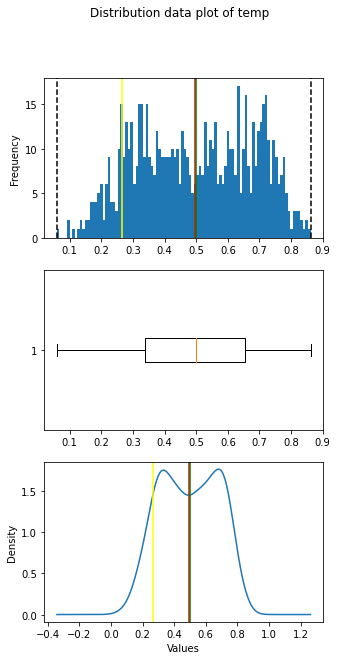

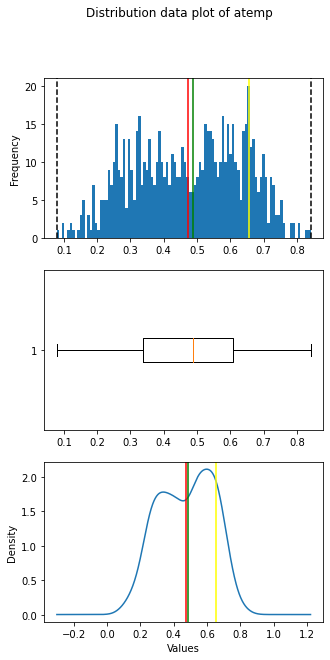

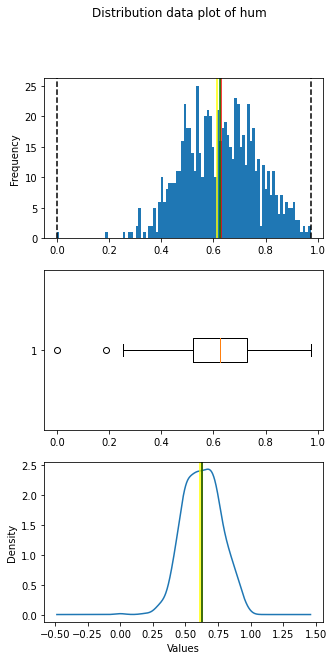

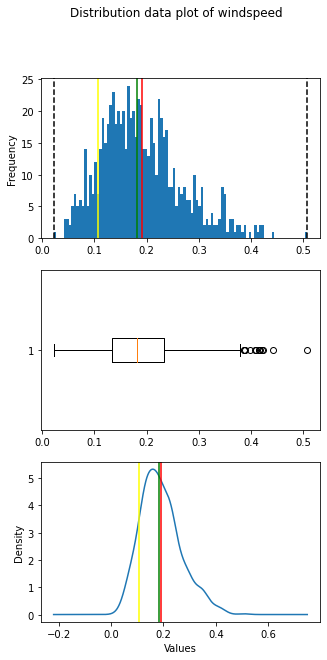

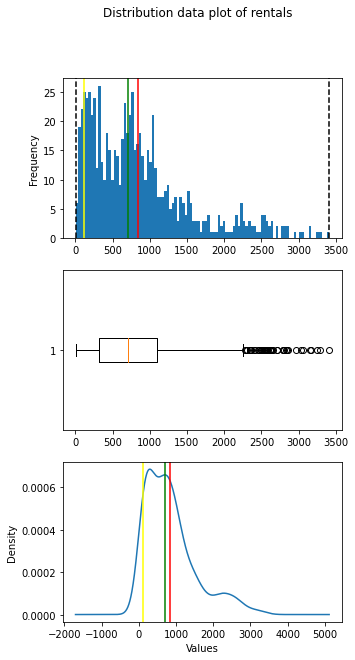

In [8]:
def distribution(col):
    for i in col:
        
        min_val=df[i].min()
        max_val=df[i].max()
        mean_val=df[i].mean()
        mid_val=df[i].median()
        mode_val=df[i].mode()[0]
        fig,ax=plt.subplots(3,1,figsize=(5,10))
        ax[0].hist(df[i],bins=100)
        ax[0].axvline(min_val,color='black',linestyle='--')
        ax[0].axvline(max_val,color='black',linestyle='--')
        ax[0].axvline(mean_val,color='red')
        ax[0].axvline(mid_val,color='g')
        ax[0].axvline(mode_val,color='yellow')
        ax[0].set_ylabel('Frequency')
        
        ax[1].boxplot(df[i],vert=False)
        ax[2]=df[i].plot(kind='kde')
        ax[2].axvline(mean_val,color='red')
        ax[2].axvline(mid_val,color='g')
        ax[2].axvline(mode_val,color='yellow')
        ax[2].set_xlabel('Values')
        fig.suptitle('Distribution data plot of ' + i)
        
        fig.show()
distribution(numeric_col)      

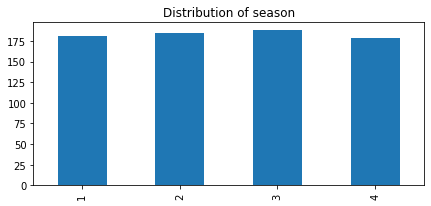

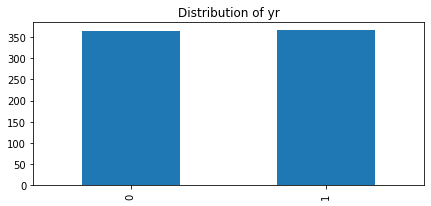

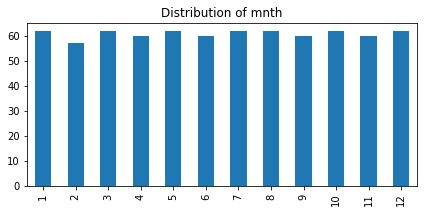

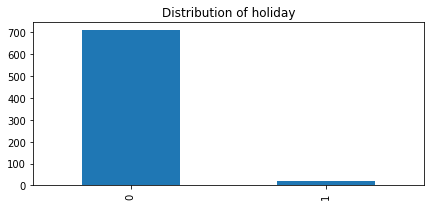

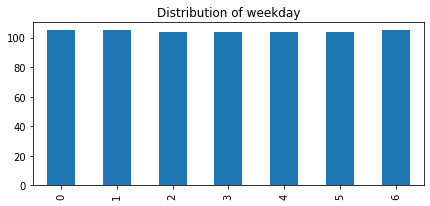

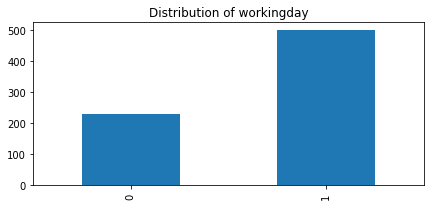

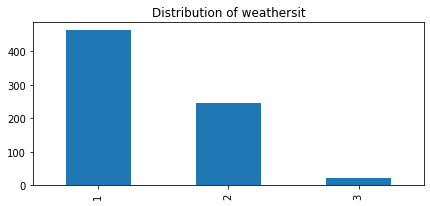

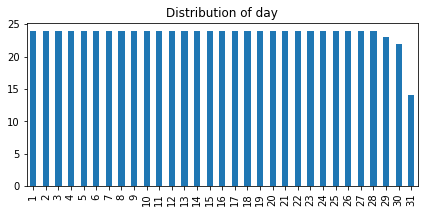

In [9]:
categorical_col=['season','yr','mnth','holiday','weekday','workingday','weathersit','day']
def distribute_cat(cat_fea):
    for i in cat_fea:
        count=df[i].value_counts().sort_index()
        fig,ax=plt.subplots(1,1,figsize=(7,3))
        count.plot(kind='bar')
        ax.set_title('Distribution of '+ i)
        fig.show()
distribute_cat(categorical_col)

In [10]:
X=df.copy()
y=X.pop('rentals')
    
discrete_features=X.dtypes==int

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  day         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [12]:
discrete_features

season         True
yr             True
mnth           True
holiday        True
weekday        True
workingday     True
weathersit     True
temp          False
atemp         False
hum           False
windspeed     False
day            True
dtype: bool

In [13]:
from sklearn.feature_selection import mutual_info_regression

def find_mi_score(X,y,discrete_features):
    mi_score=mutual_info_regression(X,y,discrete_features=discrete_features)
    mi_score=pd.Series(mi_score, name='MI Score',index=X.columns)
    return mi_score
mi_score=find_mi_score(X,y,discrete_features)
mi_score.sort_values(ascending=False)

atemp         0.410795
temp          0.387468
mnth          0.365301
season        0.254958
weekday       0.178367
workingday    0.162524
weathersit    0.083054
yr            0.082524
hum           0.056680
windspeed     0.018224
holiday       0.000000
day           0.000000
Name: MI Score, dtype: float64

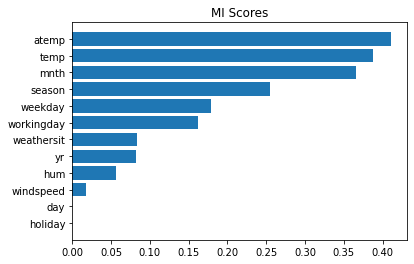

In [14]:
def plot_mi_score(score):
    score=score.sort_values(ascending=True)
    width=np.arange(len(score))
    ticks=list(score.index)
    plt.barh(width,score)
    plt.yticks(width,ticks)
    plt.title('MI Scores')

plot_mi_score(mi_score)

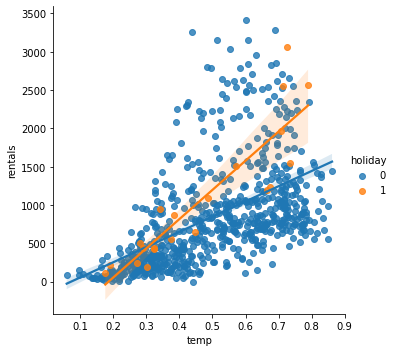

In [15]:
sns.lmplot(x='temp',y='rentals',hue='holiday',data=df);

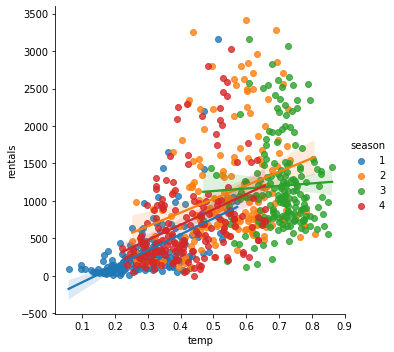

In [16]:
sns.lmplot(x='temp',y='rentals',hue='season',data=df);

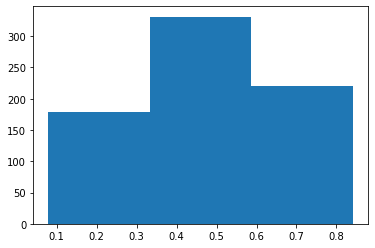

In [17]:
plt.hist(X['atemp'],bins=3);

In [18]:
from sklearn.cluster import KMeans
featuer_selection=X.select_dtypes('float')
kmean=KMeans(n_clusters=3)
featuer_selection['Cluster']=kmean.fit_predict(featuer_selection)
featuer_selection['Cluster']=featuer_selection['Cluster'].astype('category')
featuer_selection.head()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,temp,atemp,hum,windspeed,Cluster
0,0.344167,0.363625,0.805833,0.160446,0
1,0.363478,0.353739,0.696087,0.248539,0
2,0.196364,0.189405,0.437273,0.248309,1
3,0.200000,0.212122,0.590435,0.160296,1
4,0.226957,0.229270,0.436957,0.186900,1


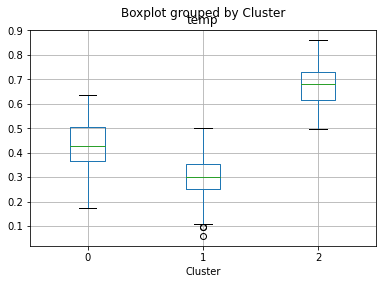

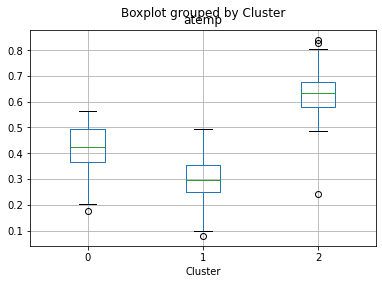

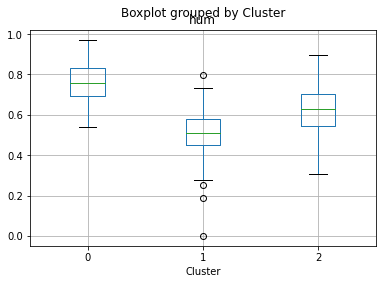

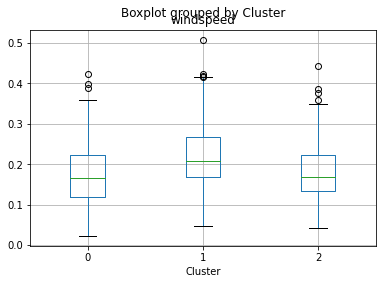

In [19]:
numeric_col=[x for x in df.columns 
            if df[x].dtypes == 'float']
for i in numeric_col:
    featuer_selection.boxplot(column=i,by='Cluster')

<AxesSubplot:xlabel='temp', ylabel='rentals'>

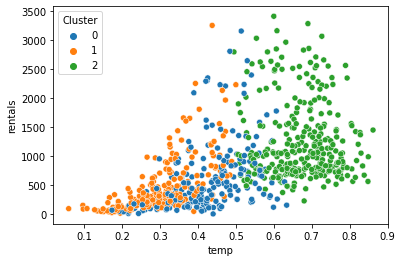

In [20]:
sns.scatterplot(x=featuer_selection['temp'],y=df['rentals'],hue=featuer_selection['Cluster'],)

In [21]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit_transform(df[numeric_col])
comp_name=[f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca=pd.DataFrame(X_pca,columns=comp_name)
X_pca.head()


,PC1,PC2,PC3,PC4
0,0.161884,-0.202960,-0.008481,-0.014873
1,0.172762,-0.080097,0.060865,0.001020
2,0.435326,0.143491,0.007282,0.011724
3,0.393882,-0.018502,-0.053333,0.001694
4,0.382503,0.140061,-0.051404,0.004638


In [22]:
loading=pd.DataFrame(
    pca.components_.T,columns=comp_name,index=numeric_col)
loading

,PC1,PC2,PC3,PC4
temp,-0.739947,0.103901,0.058729,0.661992
atemp,-0.659047,0.074751,-0.000099,-0.748378
hum,-0.118309,-0.978589,0.168302,0.006420
windspeed,0.064333,0.161186,0.983984,-0.040684


In [23]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


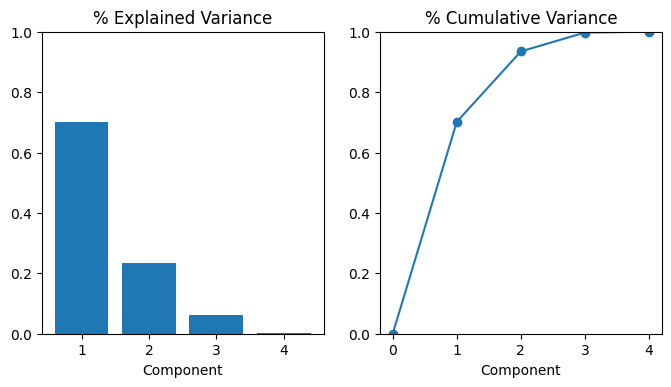

In [24]:
plot_variance(pca);

In [25]:
mi_scores = find_mi_score(X_pca, y, discrete_features=False)
mi_scores

PC1    0.408173
PC2    0.100823
PC3    0.028106
PC4    0.023881
Name: MI Score, dtype: float64

In [26]:
idx = X_pca["PC2"].sort_values(ascending=False).index
cols = numeric_col
df.loc[idx, cols]

,temp,atemp,hum,windspeed
68,0.389091,0.385668,0.000000,0.261877
49,0.399167,0.391404,0.187917,0.507463
462,0.437500,0.426129,0.254167,0.274871
152,0.715000,0.643942,0.305000,0.292287
463,0.500000,0.492425,0.275833,0.232596
...,...,...,...,...
387,0.218333,0.243058,0.911250,0.110708
340,0.410000,0.400246,0.970417,0.266175
265,0.609167,0.522125,0.972500,0.078367
35,0.233333,0.243058,0.929167,0.161079


In [27]:
idx = X_pca["PC1"].sort_values(ascending=False).index
cols = numeric_col
df.loc[idx, cols]

,temp,atemp,hum,windspeed
21,0.059130,0.079070,0.400000,0.171970
22,0.096522,0.098839,0.436522,0.246600
407,0.127500,0.101658,0.464583,0.409212
368,0.107500,0.119337,0.414583,0.184700
23,0.097391,0.117930,0.491739,0.158330
...,...,...,...,...
204,0.830000,0.794829,0.550833,0.169171
203,0.849167,0.804287,0.500000,0.131221
201,0.815000,0.826371,0.691250,0.222021
553,0.861667,0.804913,0.492083,0.163554
